Problem Statement : We need to predict the chance of admission in college on the basis of marks, college recommendation, ratings and other activites like reseach.

## Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso , LassoCV, ElasticNet, ElasticNetCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle

## EDA and Data Derivation

In [2]:
df = pd.read_csv("Desktop/LinearRegression-master/LinearRegressionTillCloud/Admission_Prediction.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [4]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [5]:
df.isnull().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [11]:
df[["GRE Score", "TOEFL Score"]] = df[["GRE Score", "TOEFL Score"]].fillna(df[["GRE Score", "TOEFL Score"]].mean())

In [12]:
df.isnull().sum()

Serial No.            0
GRE Score             0
TOEFL Score           0
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [16]:
df.fillna(method="ffill", inplace=True)

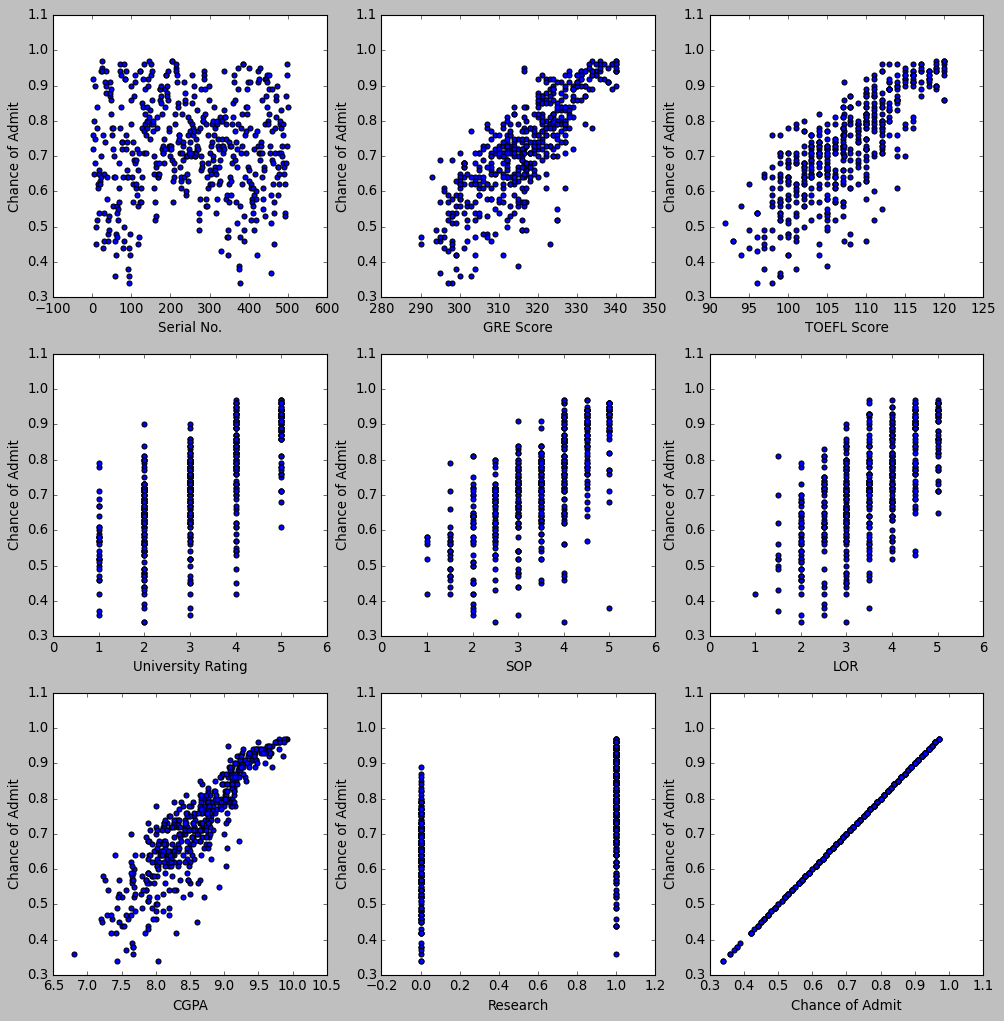

In [17]:
plt.style.use("classic")
fig = plt.figure(figsize=(15,15))
for i in range(len(df.columns)):
    ax = plt.subplot(3,3, i+1)
    ax.scatter(df.iloc[:,i], df["Chance of Admit"])
    ax.set_xlabel(df.columns[i])
    ax.set_ylabel("Chance of Admit")

In [18]:
df.drop(['Serial No.'], axis = 1, inplace= True)

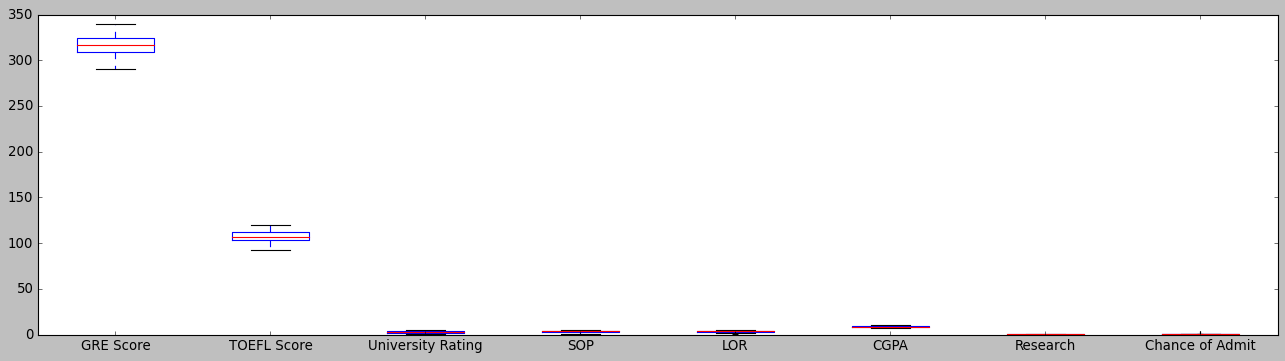

In [19]:
df.plot(kind = "box", figsize=(20,5))

In [20]:
sc = StandardScaler()
scaled = sc.fit_transform(df[["GRE Score", "TOEFL Score", "CGPA"]])

In [21]:
df[["GRE Score", "TOEFL Score", "CGPA"]] = scaled
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.842741e+00,1.788542,4.0,4.5,4.5,1.776806,1,0.92
1,6.708143e-01,-0.031058,4.0,4.0,4.5,0.485859,1,0.76
2,5.124333e-15,-0.527313,3.0,3.0,3.5,-0.954043,1,0.72
3,4.905178e-01,0.465197,3.0,3.5,2.5,0.154847,1,0.80
4,-2.306679e-01,-0.692731,2.0,2.0,3.0,-0.606480,0,0.65


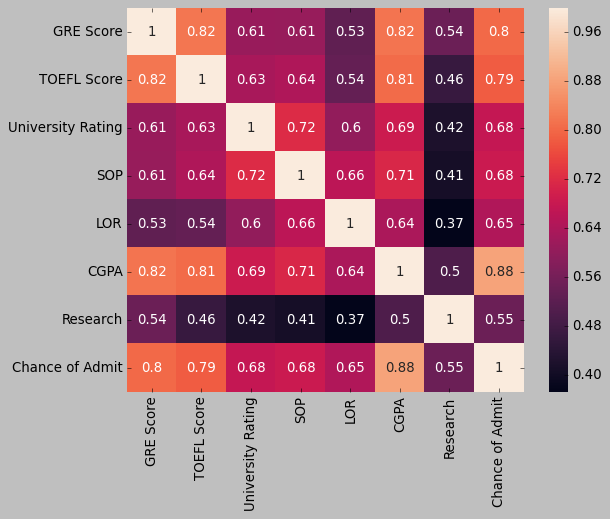

In [27]:
sns.heatmap(df.corr(), annot=True)

In [22]:
vif = []
for i in range(len(df.columns)):
    vif.append(variance_inflation_factor(np.array(df), i))

In [23]:
pd.DataFrame({"Feature":df.columns,"VIF":vif})

,Feature,VIF
0,GRE Score,4.164258
1,TOEFL Score,3.724854
2,University Rating,20.998460
3,SOP,34.373749
4,LOR,31.628319
5,CGPA,3.720466
6,Research,3.392667
7,Chance of Admit,39.258502


In [39]:
derived_feature = []
for i,j,k in df[["University Rating", "SOP", "LOR"]].values:
    derived_feature.append(round((i+j+k)/3 , 2))
    

In [41]:
df.drop(["University Rating", "SOP", "LOR"], axis = 1, inplace=True)
df["Derived_Feature"] = derived_feature

In [42]:
df.head()

,GRE Score,TOEFL Score,CGPA,Research,Chance of Admit,Derived_Feature
0,1.842741e+00,1.788542,1.776806,1,0.92,4.33
1,6.708143e-01,-0.031058,0.485859,1,0.76,4.17
2,5.124333e-15,-0.527313,-0.954043,1,0.72,3.17
3,4.905178e-01,0.465197,0.154847,1,0.80,3.00
4,-2.306679e-01,-0.692731,-0.606480,0,0.65,2.33


In [45]:
X = df.drop(["Chance of Admit"], axis = 1)
y = df[["Chance of Admit"]]

In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.25)

In [48]:
print("Shape of training dataset = ", np.shape(x_train))
print("Shape of target dataset = ", np.shape(y_train))
print("Shape of test dataset = ", np.shape(x_test))
print("Shape of test target dataset = ", np.shape(y_test))

Shape of training dataset =  (375, 5)
Shape of target dataset =  (375, 1)
Shape of test dataset =  (125, 5)
Shape of test target dataset =  (125, 1)


## Model Selection

In [49]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8061903130541779

In [50]:
lr = Lasso()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

-0.0028218015777012884

In [51]:
lr = LassoCV()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8060739570113574

In [52]:
lr = Ridge()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8062368636845629

In [53]:
lr = RidgeCV()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8062370129568701

In [54]:
lr = ElasticNet()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

-0.0028218015777012884

In [55]:
lr = ElasticNetCV()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

/Users/santoshsaxena/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8060586367851994

In [56]:
# Selected
lr = RidgeCV()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8062370129568701

## Fining Tuning

In [62]:
deg = [1,2,3,4,5]
for i in deg:
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X, y)
    x_train, x_test, y_train, y_test = train_test_split(x_poly,y, random_state = 101 , test_size = 0.25)
    lr = RidgeCV()
    lr.fit(x_train, y_train)
    print(lr.score(x_test, y_test))
    

0.8062370129568656
0.8092053423643346
0.8057395181542774
0.7943516735237883
0.7759982762680993


In [63]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(X, y)
x_train, x_test, y_train, y_test = train_test_split(x_poly,y, random_state = 101 , test_size = 0.25)
lr = RidgeCV()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.8092053423643346

## Saving for Deployment

In [68]:
pickle.dump(lr, open("Desktop/Admission Prediction/model.pickle", "wb"))
pickle.dump(sc, open("Desktop/Admission Prediction/scaler.pickle", "wb"))
pickle.dump(poly, open("Desktop/Admission Prediction/poly.pickle", "wb"))